In [11]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
import seaborn as sn

import warnings
warnings.filterwarnings("ignore")

In [12]:
PATH = "F:\\Ml files\\Emotion detection\\Data\\"

In [13]:
data = pd.read_csv(PATH+"English/ISEAR/Cleaned_ENG_EMOTIONS.csv")
data.head()

,sentiment,content,cleaned_text
0,anger,At the point today where if someone says somet...,point today someone say something remotely kin...
1,anger,@CorningFootball IT'S GAME DAY!!!! T MIN...,game day minus relentless
2,anger,This game has pissed me off more than any othe...,game piss game year blood boiling time turn st...
3,anger,@spamvicious I've just found out it's Candice ...,find candice candace pout like
4,anger,@moocowward @mrsajhargreaves @Melly77 @GaryBar...,cannot come muma th k tweet soreloser


In [14]:
data.fillna(0)

,sentiment,content,cleaned_text
0,anger,At the point today where if someone says somet...,point today someone say something remotely kin...
1,anger,@CorningFootball IT'S GAME DAY!!!! T MIN...,game day minus relentless
2,anger,This game has pissed me off more than any othe...,game piss game year blood boiling time turn st...
3,anger,@spamvicious I've just found out it's Candice ...,find candice candace pout like
4,anger,@moocowward @mrsajhargreaves @Melly77 @GaryBar...,cannot come muma th k tweet soreloser
...,...,...,...
7097,sadness,@VivienLloyd Thank you so much! Just home - st...,thank much home stun happy think sunk yet wow
7098,sadness,Just put the winter duvet on ☃️❄️🌬☔️,put winter duvet
7099,sadness,@SilkInSide @TommyJoeRatliff that's so pretty!...,pretty love sky background purple highlight du...
7100,sadness,@BluesfestByron second artist announcement loo...,second artist announcement look good bluesfest...


In [15]:
data.sentiment.value_counts()

fear       2252
anger      1701
joy        1616
sadness    1533
Name: sentiment, dtype: int64

In [17]:
data['sentiment'] = data['sentiment'].replace(['fear','anger','joy','sadness'], [1,2,3,4])

In [18]:
data.sentiment.value_counts()

1    2252
2    1701
3    1616
4    1533
Name: sentiment, dtype: int64

In [21]:
data['cleaned_text'] = data['cleaned_text'].str.replace(r'\s+', ' ')

In [22]:
data.cleaned_text[2]

'game piss game year blood boiling time turn stlcards'

## Data Split 

## (Training : 80% and Testing 20% )

In [23]:
data.cleaned_text =  data.cleaned_text.apply(str)
X = data['cleaned_text']
Y = data['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)

#checking...
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(5681,)
(1421,)
(5681,)
(1421,)


In [24]:
X_train = X_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
X_test = X_test.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
y_train = y_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
y_test = y_test.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)


In [25]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score


## Model Development 

### Pipeline creation using TFIDF, One VS rest classifier and several ML models

### SGD Classifier

In [27]:
from sklearn.linear_model import SGDClassifier
TFIDF_SGD_pipeline = Pipeline([
                               
                ('tfidf', TfidfVectorizer(tokenizer=lambda x: x.split(),lowercase=False,max_features=13000,min_df=1,ngram_range=(1,2))),
                ('clf',OneVsRestClassifier(SGDClassifier(loss='hinge', penalty='l2', alpha=1e-4, random_state=42, max_iter=100, tol=None)))
            ])

TFIDF_SGD_pipeline.fit(X_train, y_train)
TFIDF_SGD_pipeline_prediction = TFIDF_SGD_pipeline.predict(X_test)


print('accuracy %s' % accuracy_score(TFIDF_SGD_pipeline_prediction, y_test))


accuracy 0.8937368050668544


### Logistric Regeression

In [28]:
from sklearn.linear_model import LogisticRegression
TFIDF_LR_pipeline = Pipeline([

                ('tfidf', TfidfVectorizer(tokenizer=lambda x: x.split(),lowercase=False,max_features=5000,min_df=4,ngram_range=(1,2))),
                ('clf', OneVsRestClassifier(LogisticRegression(multi_class='ovr',solver='liblinear',C=1,random_state=42,tol=0.0001,max_iter=300)))
            ])

TFIDF_LR_pipeline.fit(X_train, y_train)
TFIDF_LR_pipeline_prediction = TFIDF_LR_pipeline.predict(X_test)


print('accuracy %s' % accuracy_score(TFIDF_LR_pipeline_prediction, y_test))


accuracy 0.8451794510907812


### Random Forest Classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier
TFIDF_RF_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(tokenizer=lambda x: x.split(),lowercase=False,max_features=11000,min_df=1,ngram_range=(1,2))),
                ('clf', OneVsRestClassifier(RandomForestClassifier(n_estimators=500,criterion ='entropy')))
            ])


TFIDF_RF_pipeline.fit(X_train, y_train)
TFIDF_RF_pipeline_prediction = TFIDF_RF_pipeline.predict(X_test)

print('accuracy %s' % accuracy_score(TFIDF_RF_pipeline_prediction, y_test))


accuracy 0.8719211822660099


### SVC (kernel = rbf) 

In [32]:
#RB SVM
from sklearn.svm import SVC
TFIDF_svc_rbf_pipeline = Pipeline([
                               
                ('tfidf', TfidfVectorizer(tokenizer=lambda x: x.split(),lowercase=False,max_features=9000,min_df=2,ngram_range=(1,2))),
                ('clf', OneVsRestClassifier(SVC(random_state=42, kernel='rbf')))
            ])


TFIDF_svc_rbf_pipeline.fit(X_train, y_train)
TFIDF_svc_rbf_pipeline_prediction = TFIDF_svc_rbf_pipeline.predict(X_test)

print('accuracy %s' % accuracy_score(TFIDF_svc_rbf_pipeline_prediction, y_test))


accuracy 0.900070372976777


### Passive Aggressive Classifier

In [33]:
#RB PassiveAggressiveClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
TFIDF_PassiveAggressive_pipeline = Pipeline([
                               
                ('tfidf', TfidfVectorizer(tokenizer=lambda x: x.split(),lowercase=False,max_features=9000,min_df=1,ngram_range=(1,2))),
                ('clf', OneVsRestClassifier(PassiveAggressiveClassifier(random_state=42,max_iter=500,tol=None)))
            ])


TFIDF_PassiveAggressive_pipeline.fit(X_train, y_train)
TFIDF_PassiveAggressive_pipeline_prediction = TFIDF_PassiveAggressive_pipeline.predict(X_test)

print('accuracy %s' % accuracy_score(TFIDF_PassiveAggressive_pipeline_prediction, y_test))


accuracy 0.8465869106263195


### Bagging Classifier

In [35]:
#BaggingClassifier
from sklearn.ensemble import BaggingClassifier
TFIDF_Bagging_pipeline = Pipeline([
                               
                ('tfidf', TfidfVectorizer(tokenizer=lambda x: x.split(),lowercase=False,max_features=8000,min_df=1,ngram_range=(1,2))),
                ('clf', BaggingClassifier(base_estimator=SVC(),n_estimators=10, random_state=42))
            ])


TFIDF_Bagging_pipeline.fit(X_train, y_train)
TFIDF_Bagging_pipeline_prediction = TFIDF_Bagging_pipeline.predict(X_test)

print('accuracy %s' % accuracy_score(TFIDF_Bagging_pipeline_prediction, y_test))


accuracy 0.8662913441238564


## Result Evaluation

In [36]:
from sklearn.metrics import *
MLA = {
    'SGD' : TFIDF_SGD_pipeline,
    'LR' : TFIDF_LR_pipeline,
    'RF' : TFIDF_RF_pipeline,
    'SVC-rbf' : TFIDF_svc_rbf_pipeline,
    'PAG' : TFIDF_PassiveAggressive_pipeline,
    'BAG' : TFIDF_Bagging_pipeline,
}

columns = []
compare = pd.DataFrame(columns = columns)
fpr = {}
tpr = {}
thresh ={}
n_class = 3


row_index = 0
for name,alg in MLA.items():
    MLA_name = name
    predicted = alg.predict(X_test)
    micro_averaged_recall = recall_score(y_test, predicted, average = 'micro')
    macro_averaged_f1 = f1_score(y_test, predicted, average = 'macro')
    compare.loc[row_index,'Name'] = MLA_name
    compare.loc[row_index, 'Test Accuracy'] = round(alg.score(X_test, y_test), 4)
    compare.loc[row_index, 'Precision'] = precision_score(y_test, predicted, average = 'micro')
    compare.loc[row_index, 'Recall'] = micro_averaged_recall
    compare.loc[row_index, 'F1 Score'] = macro_averaged_f1
    row_index+=1
compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)    
compare

,Name,Test Accuracy,Precision,Recall,F1 Score
3,SVC-rbf,0.9001,0.900070,0.900070,0.897611
0,SGD,0.8937,0.893737,0.893737,0.891897
2,RF,0.8719,0.871921,0.871921,0.872220
5,BAG,0.8663,0.866291,0.866291,0.864612
4,PAG,0.8466,0.846587,0.846587,0.843617
1,LR,0.8452,0.845179,0.845179,0.844329


### Performance Comparison of Every Model

In [37]:
#plot performance comaparison 
def compare_plots(y_value,score):
  plt.subplots(figsize=(15,8))
  # color_palette("vlag", as_cmap=True)
  sn.barplot(x="Name", y=y_value,palette='bright',data=compare,edgecolor=sn.color_palette('dark',7))
  
  plt.tick_params(axis='x',rotation=90,labelsize=22)
  plt.tick_params(axis='y',rotation=0,labelsize=18)
  plt.title('Comparing performance with '+y_value+'.' + '(TF-IDF)', fontsize=20)
  plt.ylabel(score +' Score', fontsize=22)
  plt.xlabel('Machine Learning Algorithms', fontsize=16)
  plt.show()
  return plt


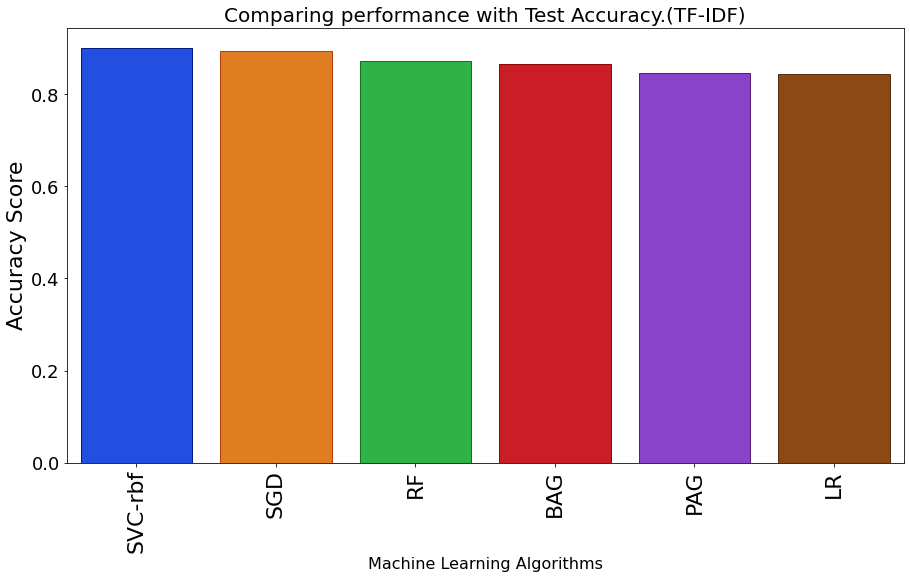

In [38]:
# Performance conparion with respect to Accuracy
compare_plots('Test Accuracy', 'Accuracy');

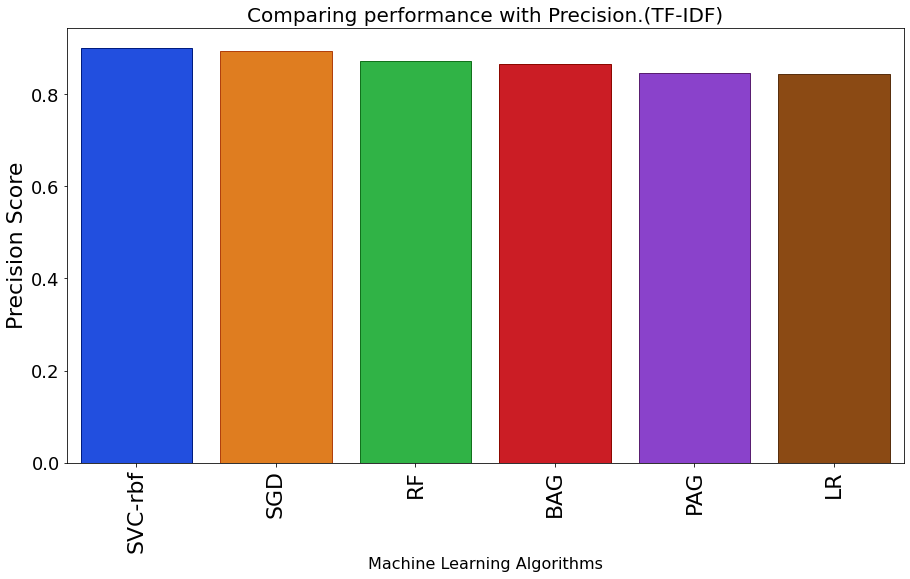

In [39]:
# Performance conparion with respect to F1 score
compare_plots('Precision', 'Precision');

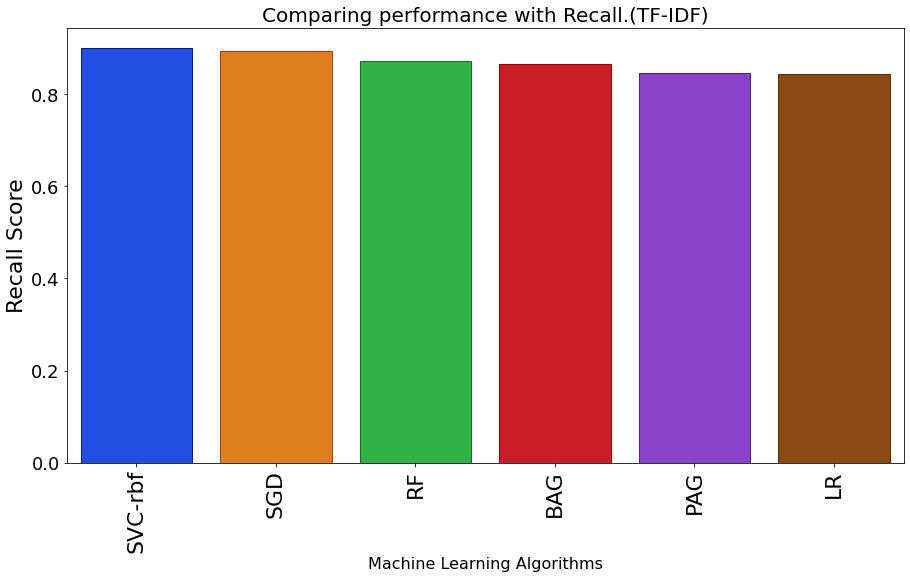

In [40]:
# Performance conparion with respect to F1 score
compare_plots('Recall', 'Recall');

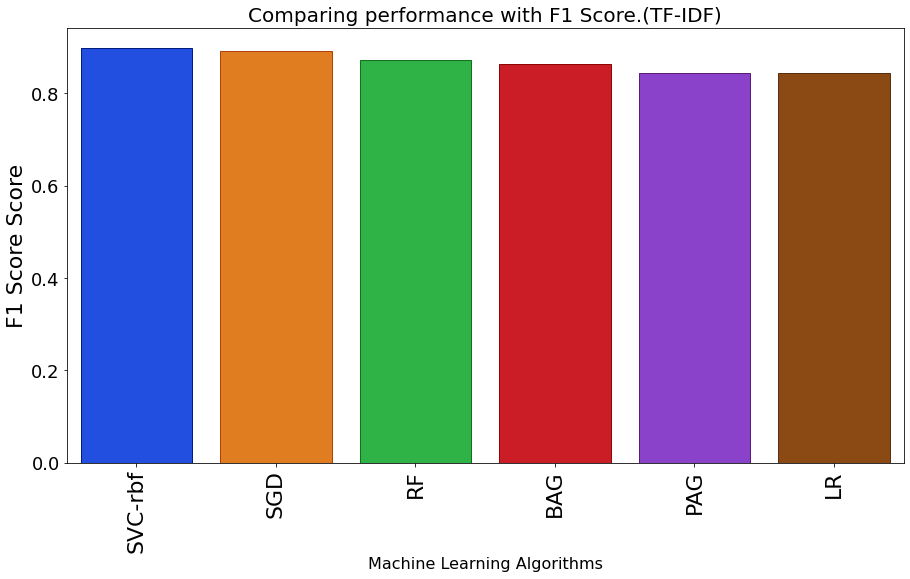

In [41]:
# Performance conparion with respect to F1 score
compare_plots('F1 Score', 'F1 Score');

## Model Validation 

### Confusion Matrix

In [42]:
def conf_matrix(pred,classfier):
  predictions = pred
  y_pred = np.array(predictions)
  cm = confusion_matrix(y_test, y_pred) 

  cm_df = pd.DataFrame(cm,
                       index = ['fear','anger','joy','sadness'], 
                       columns = ['fear','anger','joy','sadness'])
  plt.figure(figsize=(8,6))
  sn.heatmap(cm_df, annot=True,cmap="BuPu", fmt='g')
  plt.title('\n'+classfier+' Accuracy: {0:.2f}'.format(accuracy_score(y_test, y_pred)*100))
  plt.ylabel('True label',weight = 'bold',fontsize=10)
  plt.xlabel('Predicted label', weight = 'bold',fontsize=10)
  plt.tick_params(rotation=0,axis='y', labelsize=14)
  plt.tick_params(rotation=0,axis='x', labelsize=14)
  plt.xticks(rotation = 0)
  plt.yticks(rotation = 90)

  plt.show()
  plt.close()

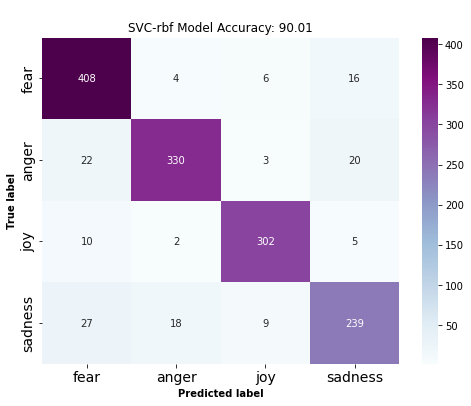

In [43]:
conf_matrix(TFIDF_svc_rbf_pipeline_prediction, 'SVC-rbf Model')